In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
tamil_train_data = pd.read_csv("/content/drive/My Drive/AAAA--DATASETS/tamil_train.tsv",sep='\t')
tamil_train_data.head()


,text,category
0,Trailer late ah parthavanga like podunga,Positive
1,Move pathutu vanthu trailer pakurvnga yaru,Positive
2,Puthupetai dhanush ah yarellam pathinga,Positive
3,"Dhanush oda character ,puthu sa erukay , mass ta",Positive
4,vera level ippa pesungada mokka nu thalaivaaaaaa,Positive


In [ ]:
tamil_val_data = pd.read_csv("/content/drive/My Drive/AAAA--DATASETS/tamil_dev.tsv",sep='\t')
tamil_val_data.head()

,text,category
0,Daily likes & views pakka vanthavaga ellaruku...,Positive
1,25 k dislikes ethuku da intha trailerku poi a...,Negative
2,#Lyca unna nenacha pavama iruku ya,Mixed_feelings
3,It looks like Hindi movie amitab bachan,Positive
4,Thalaivarukku nejamavey vayasaagiduchu... siv...,Positive


In [ ]:
tamil_train_data.describe()

,text,category
count,11335,11335
unique,11237,5
top,Graphics sari illa nu solrathukune oru gang s...,Positive
freq,6,7627


In [ ]:
import matplotlib.pyplot as plt

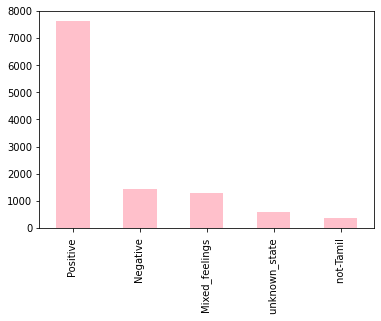

In [ ]:
tamil_train_data['category'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

In [ ]:
tamil_train_data.groupby('category').describe()

text  ...     
                count  ... freq
category               ...     
Mixed_feelings   1283  ...    3
Negative         1448  ...    1
Positive         7627  ...    6
not-Tamil         368  ...    2
unknown_state     609  ...    2

[5 rows x 4 columns]

In [ ]:
tamil_test_data = pd.read_csv("/content/drive/My Drive/AAAA--DATASETS/tamil_test_answer.tsv",sep='\t')
tamil_test_data.head()

,id,text,category
0,ta_sent_1,Yarayellam FDFS ppga ippove ready agitinga,Positive
1,ta_sent_2,Ennada viswasam mersal sarkar madhri time la l...,Positive
2,ta_sent_3,yuvan vera level ya .... valuable script. SK i...,Positive
3,ta_sent_4,70 vayasulayum thanoda rasigargala sandhosapad...,Mixed_feelings
4,ta_sent_5,all the best anna...Telugu makkal selvan fans,Positive


In [ ]:
tamil_test_data.groupby('category').describe()

id  ... text
               count  ... freq
category              ...     
Mixed_feelings   377  ...    1
Negative         424  ...    1
Positive        2075  ...    2
not-Tamil        100  ...    1
unknown_state    173  ...    1

[5 rows x 8 columns]

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')  
from nltk.corpus import stopwords  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
x_train = tamil_train_data.iloc[:,0].values  
y_train = tamil_train_data.iloc[:,1].values

x_val = tamil_val_data.iloc[:,0].values  
y_val = tamil_val_data.iloc[:,1].values

x_test = tamil_test_data.iloc[:,1].values
y_test = tamil_test_data.iloc[:,2].values

In [ ]:
print(len(x_train)," ", len(x_val) ," ", len(x_test))
print(len(y_train)," ", len(y_val) ," ", len(y_test))

11335   1260   3149
11335   1260   3149


In [ ]:
import numpy as np
X = np.append(x_train,x_val,axis=0)
X = np.append(X,x_test,axis=0)
Y = np.append(y_train,y_val,axis=0)
Y = np.append(Y,y_test,axis=0)

In [ ]:
print(len(X) ," ", len(Y))


15744   15744


In [ ]:
import re

processed_tweets = []
 
def pre_processing(X):
  for tweet in range(0, len(X)):  
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))
 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    #processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    processed_tweets.append(processed_tweet)

In [ ]:
pre_processing(X)
#processed_tweets

In [ ]:
processed_labels = []
 
def pre_processing_l(Y):
  for i in range(0, len(Y)):  
    # Removing multiple spaces
    processed_label= re.sub(r'\s+', '', str(Y[i]), flags=re.I)
 
    processed_labels.append(processed_label)

In [ ]:
pre_processing_l(Y)
#processed_labels 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=3000)  
X = tfidfconverter.fit_transform(processed_tweets).toarray()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(processed_labels)
le.classes_

array(['Mixed_feelings', 'Negative', 'Positive', 'not-Tamil',
       'unknown_state'], dtype='<U14')

In [ ]:
X_train = X[:len(x_train)] 
Y_train = Y[:len(y_train)] 

X_val = X[len(x_train) : len(x_train)+len(x_val)]
Y_val = Y[len(y_train) : len(y_train)+len(y_val)]

print(len(X_train))
print(len(Y_train))

print(len(X_val))
print(len(Y_val))

X_test = X[len(x_train)+len(x_val) : ]
Y_test = Y[len(y_train)+len(y_val) : ]

print(len(X_test))
print(len(Y_test))

11335
11335
1260
1260
3149
3149


**BERNOULI NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
bnb = BernoulliNB()
bnb.fit(X_train,Y_train)
print("Training Accuracy :" , accuracy_score(Y_train, bnb.predict(X_train)) )
predictions1 = bnb.predict(X_test)
#print(confusion_matrix(Y_test,predictions1))  
print(classification_report(Y_test,predictions1))  
print(" Test ACCURACY  : ",accuracy_score(Y_test, predictions1))

Training Accuracy : 0.7328628142920158
              precision    recall  f1-score   support

           0       0.21      0.08      0.12       377
           1       0.39      0.34      0.36       424
           2       0.73      0.87      0.80      2075
           3       0.70      0.57      0.63       100
           4       0.29      0.10      0.15       173

    accuracy                           0.66      3149
   macro avg       0.46      0.39      0.41      3149
weighted avg       0.60      0.66      0.62      3149

 Test ACCURACY  :  0.6554461733883773


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=0, class_weight={0:0.11 ,1: 0.12 ,2:0.67 ,3: 0.03, 4:0.05})  
rf.fit(X_train, Y_train)

print("Training Accuracy :" , accuracy_score(Y_train, rf.predict(X_train)) )

predictions2 = rf.predict(X_test)
#print(confusion_matrix(Y_test,predictions2))  
print(classification_report(Y_test,predictions2))  
print("TEST ACCURACY  : ",accuracy_score(Y_test, predictions2))

Training Accuracy : 0.9746801940891046
[[  37   42  282    6   10]
 [  29  100  279    7    9]
 [ 118  126 1787   17   27]
 [   3    7   44   46    0]
 [  17   19  122    2   13]]
              precision    recall  f1-score   support

           0       0.18      0.10      0.13       377
           1       0.34      0.24      0.28       424
           2       0.71      0.86      0.78      2075
           3       0.59      0.46      0.52       100
           4       0.22      0.08      0.11       173

    accuracy                           0.63      3149
   macro avg       0.41      0.35      0.36      3149
weighted avg       0.57      0.63      0.59      3149

ACCURACY SCORE :  0.6297237218164496


**SVM**

In [ ]:
from sklearn.svm import LinearSVC
sv = LinearSVC(class_weight={0:0.11 ,1: 0.12 ,2:0.67 ,3: 0.03, 4:0.05 })
sv.fit(X_train, Y_train)

print("Training Accuracy :" , accuracy_score(Y_train, sv.predict(X_train)) )

predictions3 = sv.predict(X_test)
#print(confusion_matrix(Y_test,predictions3))  
print(classification_report(Y_test,predictions3,zero_division=1))  
print(" TEST ACCURACY : ",accuracy_score(Y_test, predictions3))

Training Accuracy : 0.7182179091310101
[[   5   18  352    2    0]
 [   9   51  361    3    0]
 [  14   29 2025    5    2]
 [   0    5   71   24    0]
 [   2    7  163    0    1]]
              precision    recall  f1-score   support

           0       0.17      0.01      0.02       377
           1       0.46      0.12      0.19       424
           2       0.68      0.98      0.80      2075
           3       0.71      0.24      0.36       100
           4       0.33      0.01      0.01       173

    accuracy                           0.67      3149
   macro avg       0.47      0.27      0.28      3149
weighted avg       0.57      0.67      0.57      3149

 TEST ACCURACY :  0.6687837408701175


**DECISION TREES**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',splitter='best', class_weight={0:0.11 ,1: 0.12 ,2:0.67 ,3: 0.03, 4:0.05 },max_features='auto')
dt.fit(X_train, Y_train)

print("Training Accuracy :" , accuracy_score(Y_train, dt.predict(X_train)) )

predictions4 = dt.predict(X_test)
#print(confusion_matrix(Y_test,predictions4))  
print(classification_report(Y_test,predictions4,zero_division=1))  
print("TEST ACCURACY SCORE : ",accuracy_score(Y_test, predictions4))

Training Accuracy : 0.9944419938244375
              precision    recall  f1-score   support

           0       0.15      0.10      0.12       377
           1       0.28      0.23      0.25       424
           2       0.71      0.79      0.75      2075
           3       0.45      0.40      0.43       100
           4       0.11      0.09      0.10       173

    accuracy                           0.58      3149
   macro avg       0.34      0.32      0.33      3149
weighted avg       0.54      0.58      0.56      3149

TEST ACCURACY SCORE :  0.5814544299777707


**Ada Boost Classifier + Decision Tree**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100 , base_estimator= dt)
abc.fit(X_train,Y_train)

print("Training Accuracy :" , accuracy_score(Y_train, abc.predict(X_train)) )

predictions5 = abc.predict(X_test)
print(confusion_matrix(Y_test,predictions5))
print(classification_report(Y_test,predictions5))
print("TEST ACCURACY : ",accuracy_score(Y_test, predictions5))

Training Accuracy : 0.9945302161446846
[[  27   33  310    3    4]
 [  30   70  313    1   10]
 [ 117  110 1807   15   26]
 [   4    6   61   29    0]
 [  13   16  128    3   13]]
              precision    recall  f1-score   support

           0       0.14      0.07      0.10       377
           1       0.30      0.17      0.21       424
           2       0.69      0.87      0.77      2075
           3       0.57      0.29      0.38       100
           4       0.25      0.08      0.12       173

    accuracy                           0.62      3149
   macro avg       0.39      0.29      0.32      3149
weighted avg       0.54      0.62      0.57      3149

TEST ACCURACY :  0.6179739599872975


**MAX VOTING**

In [ ]:
classes = ['Mixed_feelings','Negative','Positive','not-Tamil','unknown_state']

In [ ]:
training_data = pd.DataFrame()
n = r = s = d = a = yt = []

p1 = bnb.predict(X_train)
p2 = rf.predict(X_train)
p3 = sv.predict(X_train)
p4 = dt.predict(X_train)
p5 = abc.predict(X_train)

for i in range(0,len(X_test)):
  n.append(classes[predictions1[i]])
  r.append(classes[predictions2[i]])
  #s.append(classes[predictions3[i]])
  d.append(classes[predictions4[i]])
  a.append(classes[predictions5[i]])
  yt.append(classes[Y_test[i]])

In [ ]:
training_data['Naive Bayes'] = n
training_data['Random Forest'] = r
#training_data['SVM'] = s
training_data['Decision Tree'] = d
training_data['Ada Boost'] = a

training_data.head()

,Naive Bayes,Random Forest,Decision Tree,Ada Boost
0,Positive,Positive,Positive,Positive
1,Positive,Positive,Positive,Positive
2,unknown_state,unknown_state,unknown_state,unknown_state
3,Positive,Positive,Positive,Positive
4,Positive,Positive,Positive,Positive


In [ ]:
training_res = pd.DataFrame()
training_res['Pred'] = training_data.mode(axis=1)[0]
training_res.head()

,Pred
0,Positive
1,Positive
2,unknown_state
3,Positive
4,Positive


In [ ]:
voting_data = pd.DataFrame() 

In [ ]:
nbd = []
rfd = []
svmd = []
dtd = []
abcd = []
y_true = []

for i in range(0,len(X_test)):
  nbd.append(classes[predictions1[i]])
  rfd.append(classes[predictions2[i]])
  #svmd.append(classes[predictions3[i]])
  dtd.append(classes[predictions4[i]])
  abcd.append(classes[predictions5[i]])
  y_true.append(classes[Y_test[i]])

voting_data['Naive Bayes'] = nbd
voting_data['Random Forest'] = rfd
#voting_data['SVM'] = svmd
voting_data['Decision Tree'] = dtd
voting_data['Ada Boost'] = abcd

voting_data.head()

,Naive Bayes,Random Forest,Decision Tree,Ada Boost
0,Positive,Positive,unknown_state,Positive
1,Mixed_feelings,Negative,Negative,Positive
2,Positive,Positive,Positive,Positive
3,Negative,Negative,Negative,Positive
4,Positive,Positive,Positive,Positive


In [ ]:
voting_res = pd.DataFrame()
voting_res['Pred'] = voting_data.mode(axis=1)[0]
voting_res.head()

,Pred
0,Positive
1,Negative
2,Positive
3,Negative
4,Positive


In [ ]:
print("Training accuracy : ", accuracy_score(yt , training_res['Pred']))

predictions6 = voting_res['Pred']
#print(confusion_matrix(y_true,predictions6))
print(classification_report(y_true,predictions6))
print("ACCURACY SCORE : ",accuracy_score(y_true, predictions6))

Training accuracy :  1.0
[[  28   55  288    4    2]
 [  42  118  259    2    3]
 [  95  125 1836    8   11]
 [   1    5   55   39    0]
 [  11   19  132    0   11]]
                precision    recall  f1-score   support

Mixed_feelings       0.16      0.07      0.10       377
      Negative       0.37      0.28      0.32       424
      Positive       0.71      0.88      0.79      2075
     not-Tamil       0.74      0.39      0.51       100
 unknown_state       0.41      0.06      0.11       173

      accuracy                           0.65      3149
     macro avg       0.48      0.34      0.37      3149
  weighted avg       0.58      0.65      0.60      3149

ACCURACY SCORE :  0.6452842172118133


**PREDICTIONS**

In [ ]:
test_voting = pd.DataFrame()

tamil_test_data.head()

In [ ]:
pred_class = []
Y_test = bnb.predict(X_test)
for item in Y_test:
  pred_class.append(classes[item])

bnb_data = tamil_test_data
bnb_data['label'] = pred_class

test_voting['Naive Bayes'] = pred_class

compression_opts = dict(method='zip',archive_name='HRS TECHIE_Tamil.txt')  
bnb_data.to_csv('HRS TECHIE.zip', sep='\t', index=False, compression=compression_opts)

print(pred_class.count('Mixed_feelings'))
print(pred_class.count('Negative'))
print(pred_class.count('Positive'))
print(pred_class.count('not-Tamil'))
print(pred_class.count('unknown_state'))

In [ ]:
pred_class = []
Y_test = rf.predict(X_test)
for item in Y_test:
  pred_class.append(classes[item])

rf_data = tamil_test_data
rf_data['label'] = pred_class

test_voting['Random Forest'] = pred_class


compression_opts = dict(method='zip',archive_name='HRS-TECHIE_Tamil.tsv')  
rf_data.to_csv('HRS-TECHIE.zip', sep='\t', index=False, compression=compression_opts)

print(pred_class.count('Mixed_feelings'))
print(pred_class.count('Negative'))
print(pred_class.count('Positive'))
print(pred_class.count('not-Tamil'))
print(pred_class.count('unknown_state'))

In [ ]:
pred_class = []
Y_test = sv.predict(X_test)
for item in Y_test:
  pred_class.append(classes[item])

svm_data = tamil_test_data
svm_data['label'] = pred_class

#test_voting['SVM'] = pred_class

compression_opts = dict(method='zip',archive_name='HRS-TECHIE_Tamil.tsv')  
svm_data.to_csv('HRS-TECHIE.zip', sep='\t', index=False, compression=compression_opts)

print(pred_class.count('Mixed_feelings'))
print(pred_class.count('Negative'))
print(pred_class.count('Positive'))
print(pred_class.count('not-Tamil'))
print(pred_class.count('unknown_state'))

In [ ]:
pred_class = []
Y_test = dt.predict(X_test)
for item in Y_test:
  pred_class.append(classes[item])

dt_data = tamil_test_data
dt_data['label'] = pred_class

test_voting['Decision Tree'] = pred_class

compression_opts = dict(method='zip',archive_name='HRS-TECHIE_Tamil.tsv')  
dt_data.to_csv('HRS-TECHIE.zip', sep='\t', index=False, compression=compression_opts)

print(pred_class.count('Mixed_feelings'))
print(pred_class.count('Negative'))
print(pred_class.count('Positive'))
print(pred_class.count('not-Tamil'))
print(pred_class.count('unknown_state'))

In [ ]:
pred_class = []
Y_test = abc.predict(X_test)
for item in Y_test:
  pred_class.append(classes[item])

abc_data = tamil_test_data
abc_data['label'] = pred_class

test_voting['Ada Boost'] = pred_class

compression_opts = dict(method='zip',archive_name='HRS-TECHIE_Tamil.tsv')  
abc_data.to_csv('HRS-TECHIE.zip', sep='\t', index=False, compression=compression_opts)

print(pred_class.count('Mixed_feelings'))
print(pred_class.count('Negative'))
print(pred_class.count('Positive'))
print(pred_class.count('not-Tamil'))
print(pred_class.count('unknown_state'))

In [ ]:
test_voting.head()

In [ ]:
test_res_voting = pd.DataFrame()
test_res_voting['Pred'] = test_voting.mode(axis=1)[0]
test_res_voting.head()

In [ ]:
ensemble_data = tamil_test_data
ensemble_data['label'] = test_res_voting['Pred']
pred_class = (ensemble_data['label']).to_list()

compression_opts = dict(method='zip',archive_name='HRS-TECHIE_Tamil.tsv')  
ensemble_data.to_csv('HRS-TECHIE.zip', sep='\t', index=False, compression=compression_opts)

print(pred_class.count('Mixed_feelings'))
print(pred_class.count('Negative'))
print(pred_class.count('Positive'))
print(pred_class.count('not-Tamil'))
print(pred_class.count('unknown_state'))